Testing that the NUTS checkpointing works as intended.

In [32]:
import pickle
import numpy as np
import nutstrajectory
import matplotlib.pyplot as pp

In [33]:
%matplotlib inline

In [115]:
reload(nutstrajectory)

<module 'nutstrajectory' from 'nutstrajectory.py'>

In [5]:
def correlated_normal(theta):
    """
    Example of a target distribution that could be sampled from using NUTS.
    (Although of course you could sample from it more efficiently)
    Doesn't include the normalizing constant.
    """

    # Precision matrix with covariance [1, 1.98; 1.98, 4].
    # A = np.linalg.inv( cov )
    A = np.asarray([[50.251256, -24.874372],
                    [-24.874372, 12.562814]])

    grad = -np.dot(theta, A)
    logp = 0.5 * np.dot(grad, theta.T)
    return logp, grad

In [130]:
D = 2
M = 40000
Madapt = 4000
theta0 = np.random.normal(0, 1, D)
delta = 0.2

mean = np.zeros(2)
cov = np.asarray([[1, 1.98],
                  [1.98, 4]])

In [131]:
!rm chain.txt save* 

In [132]:
samples, lnprob, epsilon = nutstrajectory.nuts6(correlated_normal, M, Madapt, theta0, delta, outFile='chain.txt', pickleFile='save')

find_reasonable_epsilon= 0.25
Burnin finished 57.15 percent in 0.500050 s  epsilon = 2.451691e-01
Finished 96.16 percent in 10.518028 s  epsilon = 3.022626e-01

In [141]:
!rm chain2.txt save2*

The following cell needs to be interrupted by hand halfway through.

In [142]:
samples2, lnprob2, epsilon2 = nutstrajectory.nuts6(correlated_normal, M, Madapt, theta0, delta, outFile='chain2.txt', pickleFile='save2')

find_reasonable_epsilon= 0.125
Burnin finished 60.02 percent in 0.501002 s  epsilon = 2.713609e-01
Finished 36.03 percent in 4.516037 s  epsilon = 3.008575e-01

KeyboardInterrupt: 

In [143]:
!wc -l chain.txt 

   39999 chain.txt


In [144]:
!wc -l chain2.txt

   15186 chain2.txt


In [145]:
!cp save2-lnprob.npy save3-lnprob.npy

In [146]:
!cp save2-samples.npy save3-samples.npy

In [147]:
!cp save2.pickle save3.pickle

In [148]:
!cp chain2.txt chain3.txt

In [149]:
samples2, lnprob2, epsilon2 = nutstrajectory.nuts6(correlated_normal, M, Madapt, theta0, delta, outFile='chain2.txt', pickleFile='save2')

Finished 97.25 percent in 6.047566 s  epsilon = 3.008575e-01

In [150]:
samples3, lnprob3, epsilon3 = nutstrajectory.nuts6(correlated_normal, M, Madapt, theta0, delta, outFile='chain3.txt', pickleFile='save3')

Finished 97.21 percent in 6.031158 s  epsilon = 3.008575e-01

In [151]:
!wc -l chain2.txt

   39999 chain2.txt


In [152]:
!wc -l chain3.txt

   39999 chain3.txt


(array([ 0.00124647,  0.0014731 ,  0.00547692,  0.01133155,  0.02840443,
         0.04434415,  0.07830104,  0.12275851,  0.15947274,  0.16902902,
         0.19180545,  0.17692334,  0.15701757,  0.13053951,  0.09903779,
         0.06492981,  0.04321099,  0.01714842,  0.00695002,  0.0014731 ]),
 array([-6.91374921, -6.25188062, -5.59001203, -4.92814343, -4.26627484,
        -3.60440625, -2.94253766, -2.28066907, -1.61880047, -0.95693188,
        -0.29506329,  0.3668053 ,  1.02867389,  1.69054248,  2.35241108,
         3.01427967,  3.67614826,  4.33801685,  4.99988544,  5.66175404,
         6.32362263]),
 <a list of 1 Patch objects>)

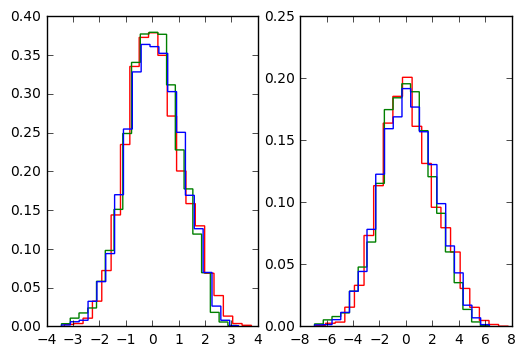

In [153]:
pp.subplot(1,2,1)
pp.hist(samples[:,0],20,normed=True,histtype='step',color='r')
pp.hist(samples2[:,0],20,normed=True,histtype='step',color='g')
pp.hist(samples3[:,0],20,normed=True,histtype='step',color='b')
pp.subplot(1,2,2)
pp.hist(samples[:,1],20,normed=True,histtype='step',color='r')
pp.hist(samples2[:,1],20,normed=True,histtype='step',color='g')
pp.hist(samples3[:,1],20,normed=True,histtype='step',color='b')